In [1]:
#imports cell
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

In [2]:
import scipy.cluster.hierarchy as sch


In [3]:
from sklearn.cluster import AgglomerativeClustering 

In [4]:
from sklearn.cluster import DBSCAN

# Reading Data from excel file

In [5]:
frefly = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data', usecols="B:L")
frefly.head()

<IPython.core.display.Javascript object>

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
frefly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
frefly.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Scaling the data by min max normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(frefly)


# K-Means Clustering

In [9]:
#Applying elbow method to find the optimal number of clusters
wcss=[]
for k in range (2,20):
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

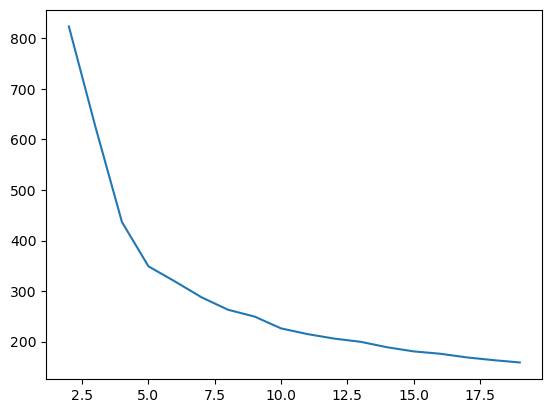

In [10]:
#graph of WCSS vs no. of clusters
plt.plot(list(range(2,20)), wcss)

### 5,6,7,8,9,10 are apparently on the elbow

In [11]:

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=42 )
    k_pred = kmeans.fit_predict(scaled_data)
    print('Clusters=', k, 'silhouette score:', silhouette_score(X=scaled_data, labels=k_pred, metric='euclidean'))

Clusters= 2 silhouette score: 0.535930510919477
Clusters= 3 silhouette score: 0.4646127065079619
Clusters= 4 silhouette score: 0.47483765255961
Clusters= 5 silhouette score: 0.4430672072796034
Clusters= 6 silhouette score: 0.38854094359163266
Clusters= 7 silhouette score: 0.3909601011818369
Clusters= 8 silhouette score: 0.3809790022580984
Clusters= 9 silhouette score: 0.3771799963241372
Clusters= 10 silhouette score: 0.3448517148143451


## The best silhouette_score among values at elbow is for 4 clusters so we choose 4 clusters

In [12]:
#Predicting 4 clusters
kmeans = KMeans(n_clusters=4, random_state =42)
k_pred_4 = kmeans.fit_predict(scaled_data)
print(pd.Series(k_pred_4).value_counts())
print('Silhouette Score : ' ,silhouette_score(X=scaled_data, labels=k_pred_4 ))

<IPython.core.display.Javascript object>

1    1897
2     808
0     673
3     621
Name: count, dtype: int64
Silhouette Score :  0.47483765255961


## For plotting the clusters lets create 2 principal components out of out 10 dimensional data

# Performing PCA on the scaled data and extracting 2 most significants components

In [13]:
#Principal Component Analysis on the data to convert the data to 2 dimensions
pca = PCA(n_components=2)
two_dim_data = pca.fit_transform(scaled_data)

## By plotting the scatter plot of 2 principal components we can see that the data is visibly separated in 2 clusters

<IPython.core.display.Javascript object>

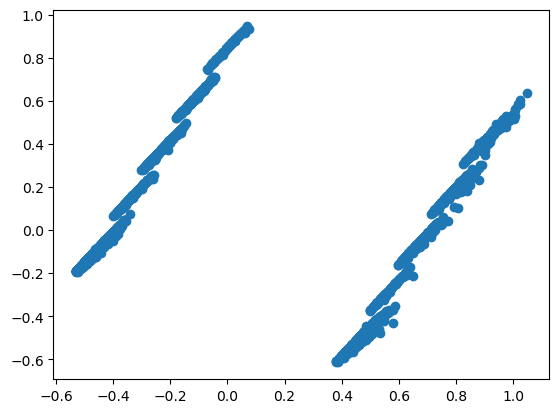

In [14]:
plt.scatter(x=two_dim_data[:,0], y=two_dim_data[:,1])

## Plotting our 4 clusters obtained from k-means

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

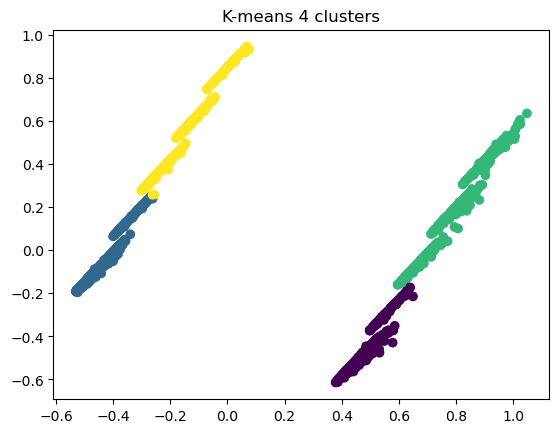

In [15]:
plt.scatter(x=two_dim_data[:,0], y=two_dim_data[:,1], c=k_pred_4)
plt.title('K-means 4 clusters');

## Since we are getting bery high silhouette score for 2 clusters (0.535930). Also out principal components appear to be in 2 clusters lets make 2 clusters by k-means as well

In [16]:
#Predicting 2 clusters by k-means
kmeans = KMeans(n_clusters=2, random_state =42)
k_pred_2 = kmeans.fit_predict(scaled_data)
print(pd.Series(k_pred_2).value_counts())
print('Silhouette Score : ' ,silhouette_score(X=scaled_data, labels=k_pred_2 ))

<IPython.core.display.Javascript object>

1    2518
0    1481
Name: count, dtype: int64
Silhouette Score :  0.535930510919477


## Plotting the 2 clusters obtained by k-means

<IPython.core.display.Javascript object>

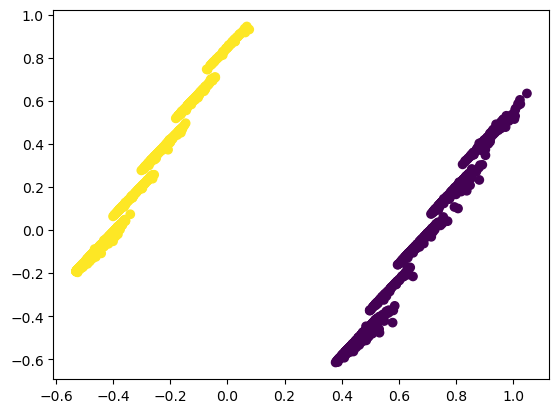

In [17]:
plt.scatter(x=two_dim_data[:,0], y=two_dim_data[:,1], c=k_pred_2)

## Adding the 4 cluster and 2 cluster predictions of k-means to the original dataframe

In [18]:
frefly['k_clusters_4'] = k_pred_4

In [19]:
frefly['k_clusters_2'] = k_pred_2

# Agglomerative Clustering

# Determining optimal number of clusters based on silhouette scores by clustering with average linkage

In [20]:
for n in range(2,20):
    agg_clu = AgglomerativeClustering(n_clusters=n, linkage='average', metric='euclidean')
    agg_pred = agg_clu.fit_predict(X=scaled_data)
    sil_sco = silhouette_score(X=scaled_data, labels=agg_pred, metric='euclidean')
    print('CLUSTERS :',n,'SILHOUETTE SCORE : ',sil_sco)

CLUSTERS : 2 SILHOUETTE SCORE :  0.47040913679492186
CLUSTERS : 3 SILHOUETTE SCORE :  0.39619766243707655
CLUSTERS : 4 SILHOUETTE SCORE :  0.5286018409871408
CLUSTERS : 5 SILHOUETTE SCORE :  0.5082555071160846
CLUSTERS : 6 SILHOUETTE SCORE :  0.4872677894382957
CLUSTERS : 7 SILHOUETTE SCORE :  0.43873250506611094
CLUSTERS : 8 SILHOUETTE SCORE :  0.4087022964575043
CLUSTERS : 9 SILHOUETTE SCORE :  0.40082699430237484
CLUSTERS : 10 SILHOUETTE SCORE :  0.35722100020389563
CLUSTERS : 11 SILHOUETTE SCORE :  0.3570010664251838
CLUSTERS : 12 SILHOUETTE SCORE :  0.33739932280673074
CLUSTERS : 13 SILHOUETTE SCORE :  0.33673673460968867
CLUSTERS : 14 SILHOUETTE SCORE :  0.30059243135978786
CLUSTERS : 15 SILHOUETTE SCORE :  0.34886751950530925
CLUSTERS : 16 SILHOUETTE SCORE :  0.3363726363516659
CLUSTERS : 17 SILHOUETTE SCORE :  0.3321953656972308
CLUSTERS : 18 SILHOUETTE SCORE :  0.33131431408981865
CLUSTERS : 19 SILHOUETTE SCORE :  0.4018786076320852


## We can see that 4 clusters gives the best value for silhouette score when clustering with average linkage

In [21]:
agg_clu = AgglomerativeClustering(n_clusters=4, linkage='average', metric='euclidean')
agg_pred_4 = agg_clu.fit_predict(scaled_data)
print(pd.Series(agg_pred_4).value_counts())
print('Silhouette Score : ' ,silhouette_score(X=scaled_data, labels=agg_pred_4 ))

<IPython.core.display.Javascript object>

1    2518
0    1476
3       4
2       1
Name: count, dtype: int64
Silhouette Score :  0.5286018409871408


## But the 4 cluster predictions do not look useful as only few points lie in 2 clusters and almost all the other points are divided in only two clusters
## So, the agglomerative clustering technique is not suitable as the data seems to have some outliers fo which we move to DBSCAN

In [22]:
agg_clu = AgglomerativeClustering(n_clusters=7, linkage='average', metric='euclidean')
agg_pred_2 = agg_clu.fit_predict(scaled_data)
print(pd.Series(agg_pred_2).value_counts())
print('Silhouette Score : ' ,silhouette_score(X=scaled_data, labels=agg_pred_2 ))

<IPython.core.display.Javascript object>

1    2511
0    1462
4       8
2       7
6       6
3       4
5       1
Name: count, dtype: int64
Silhouette Score :  0.43873250506611094


<IPython.core.display.Javascript object>

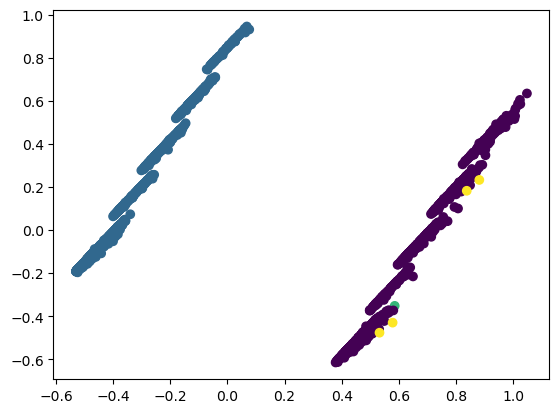

In [23]:
plt.scatter(x=two_dim_data[:,0], y=two_dim_data[:,1], c=agg_pred_4)

In [24]:
#Adding the predictions to the actual data
frefly['agg_pred_4'] = agg_pred_4
frefly.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters_4,k_clusters_2,agg_pred_4
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0,0


# DBSCAN

## Checking the silhouette scores for different combinations of eps [0.1 - 2.0] and min_samples values [5 - 20]

In [25]:
eps_vals = np.arange(0.1,2.1,0.1)
min_samp_list = range(5,21)

best_score = -1
best_params = None
only_one_label = False

for eps in eps_vals:
    for min_samp in min_samp_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)
        labels = dbscan.fit_predict(scaled_data)
        
        if len(set(labels)) < 2:
            print('Only One Cluster')
            break

        
        elif len(set(labels)) == 2:
            for label in set(labels):
                if label==-1:
                    print('Only One Cluster & Outliers')
                    only_one_label = True
            if only_one_label:
                break
        
        score = silhouette_score(X=scaled_data, labels=labels)
        print(f'eps={eps}, min_samples={min_samp}, silhouette score={score}')
        if score>best_score:
            best_score = score
            best_params = [eps,min_samp]
print(f'The best value for eps={best_params[0]}, min_samples={best_params[1]}. Best Silhouette Score={best_score}')
                

<IPython.core.display.Javascript object>

eps=0.1, min_samples=5, silhouette score=0.1581285426282123
eps=0.1, min_samples=6, silhouette score=0.011347246365108338
eps=0.1, min_samples=7, silhouette score=0.030624898280699277
eps=0.1, min_samples=8, silhouette score=0.13995074857437487
eps=0.1, min_samples=9, silhouette score=0.12840976867479503
eps=0.1, min_samples=10, silhouette score=0.1190588311652761
eps=0.1, min_samples=11, silhouette score=0.1119262111920455
eps=0.1, min_samples=12, silhouette score=0.11541559661059578
eps=0.1, min_samples=13, silhouette score=0.08746147443796996
eps=0.1, min_samples=14, silhouette score=0.08203807873992595
eps=0.1, min_samples=15, silhouette score=0.0764361789588964
eps=0.1, min_samples=16, silhouette score=0.07206739301101468
eps=0.1, min_samples=17, silhouette score=0.07009816625785907
eps=0.1, min_samples=18, silhouette score=0.06568124573987397
eps=0.1, min_samples=19, silhouette score=0.05856379978683475
eps=0.1, min_samples=20, silhouette score=0.07076865999215115
eps=0.2, min_sa

eps=0.8, min_samples=20, silhouette score=0.5351606918177734
eps=0.9, min_samples=5, silhouette score=0.535930510919477
eps=0.9, min_samples=6, silhouette score=0.535930510919477
eps=0.9, min_samples=7, silhouette score=0.535930510919477
eps=0.9, min_samples=8, silhouette score=0.535930510919477
eps=0.9, min_samples=9, silhouette score=0.535930510919477
eps=0.9, min_samples=10, silhouette score=0.535930510919477
eps=0.9, min_samples=11, silhouette score=0.535930510919477
eps=0.9, min_samples=12, silhouette score=0.535930510919477
eps=0.9, min_samples=13, silhouette score=0.535930510919477
eps=0.9, min_samples=14, silhouette score=0.535930510919477
eps=0.9, min_samples=15, silhouette score=0.535930510919477
eps=0.9, min_samples=16, silhouette score=0.535930510919477
eps=0.9, min_samples=17, silhouette score=0.535930510919477
eps=0.9, min_samples=18, silhouette score=0.535930510919477
eps=0.9, min_samples=19, silhouette score=0.535930510919477
eps=0.9, min_samples=20, silhouette score=0.

## We need to have high silhouette scores but also should get as many outliers detected as possible
## All high silhouette scores are obtained by 2 clusters. So, it is clear that we will be having 2 clusters
## Now we will trade few decimal points of silhouette scores in return of as many outliers as possible
## eps=0.3, min_samples=20 gives the highest number of outliers(135) along with maintaining a high silhouette score of 0.512254

## A good way of finding the optimal value of 'eps' is the k-nearest distance plot
## The values at the elbow are most likely to be a good choose for the 'eps'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

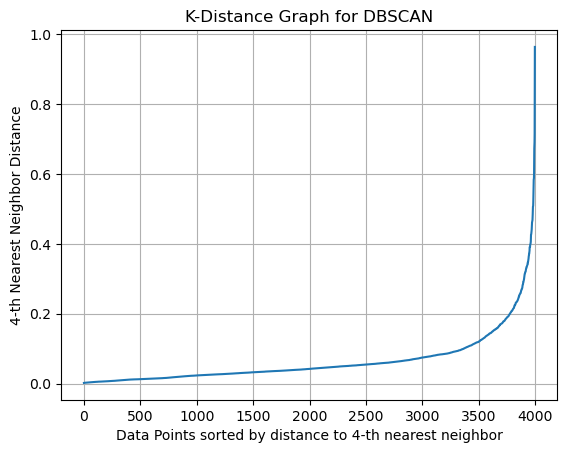

In [26]:
from sklearn.neighbors import NearestNeighbors

# Sample data (replace this with your actual data)
X = scaled_data

# Number of neighbors (k) to consider
k = 4

# Compute the k-nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the distances to the k-th nearest neighbor
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.plot(k_distances)
plt.xlabel('Data Points sorted by distance to {}-th nearest neighbor'.format(k))
plt.ylabel('{}-th Nearest Neighbor Distance'.format(k))
plt.title('K-Distance Graph for DBSCAN')
plt.grid(True)
plt.show()

## We can see that the k-nearest distance plot also validates our choice of eps=0.3 as it falls on the elbow of graph

In [27]:
dbscan = DBSCAN(eps=0.3, min_samples=20)
db_pred_pt3_20 = dbscan.fit_predict(scaled_data)
pd.Series(db_pred_pt3_20).value_counts()

<IPython.core.display.Javascript object>

 0    2466
 1    1398
-1     135
Name: count, dtype: int64

<IPython.core.display.Javascript object>

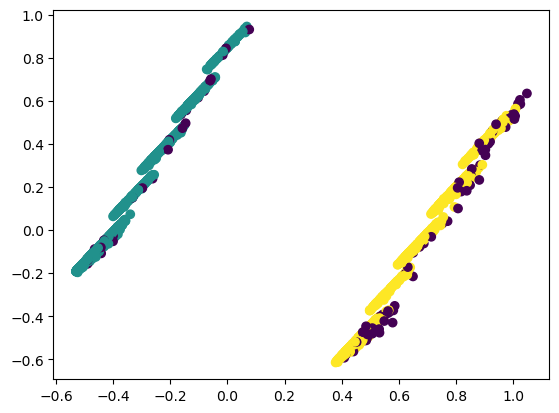

In [28]:
plt.scatter(x=two_dim_data[:,0], y=two_dim_data[:,1], c=db_pred_pt3_20)

In [29]:
#Adding the clusters of DBSCAN to the original column
frefly['db_clusters_2'] = db_pred_pt3_20

In [30]:
frefly

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters_4,k_clusters_2,agg_pred_4,db_clusters_2
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,0,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,1,1,0


In [31]:
#Cluster medians of different features
cluster_medians = frefly.groupby('k_clusters_4')[['Balance', 'Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12', 'Days_since_enroll', 'Award?']].median()
cluster_medians.T

k_clusters_4,0,1,2,3
Balance,39601.0,25685.0,66966.5,94938.0
Qual_miles,0.0,0.0,0.0,0.0
cc1_miles,1.0,1.0,4.0,3.0
cc2_miles,1.0,1.0,1.0,1.0
cc3_miles,1.0,1.0,1.0,1.0
Bonus_miles,6027.0,1500.0,38106.0,26666.0
Bonus_trans,8.0,4.0,18.0,15.0
Flight_miles_12mo,100.0,0.0,0.0,0.0
Flight_trans_12,1.0,0.0,0.0,0.0
Days_since_enroll,4278.0,3452.0,4917.5,4423.0


In [32]:
#Cluster means of different features
cluster_means = frefly.groupby('k_clusters_4')[['Balance', 'Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12', 'Days_since_enroll', 'Award?' ]].mean()
cluster_means.T

k_clusters_4,0,1,2,3
Balance,83529.153046,40747.617290,108317.387376,118032.061192
Qual_miles,290.453195,92.345809,198.336634,73.112721
cc1_miles,1.156018,1.092778,3.915842,3.576490
cc2_miles,1.032689,1.017923,1.001238,1.001610
cc3_miles,1.008915,1.004217,1.025990,1.022544
Bonus_miles,8850.395245,3335.152873,45609.657178,31282.666667
Bonus_trans,10.476969,6.488666,20.201733,17.251208
Flight_miles_12mo,1030.112927,226.599895,713.728960,225.352657
Flight_trans_12,3.148588,0.658935,2.142327,0.632850
Days_since_enroll,4338.867756,3619.111755,4863.439356,4436.307568


<IPython.core.display.Javascript object>

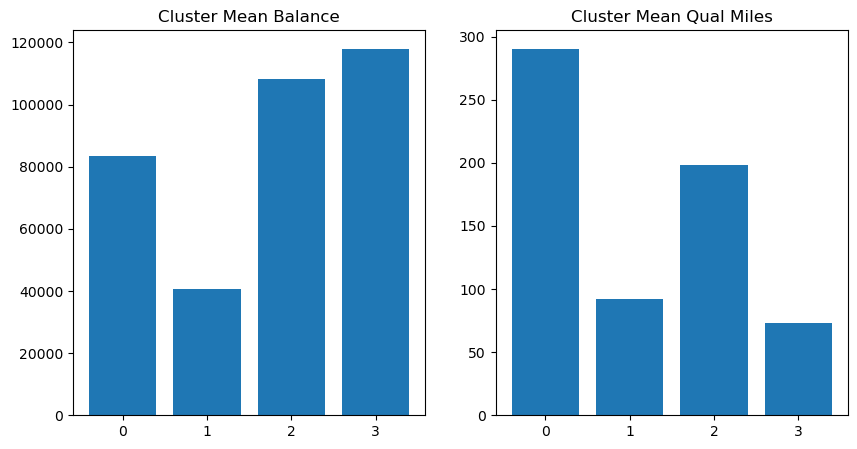

In [33]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.bar(height = cluster_means['Balance'], x=cluster_medians.index)
ax.set_title('Cluster Mean Balance');

ax = fig.add_subplot(122)
ax.bar(height = cluster_means['Qual_miles'], x=cluster_means.index)
ax.set_title('Cluster Mean Qual Miles');

# Cluster 0 (Medium Balance, High Qual Miles) - 
## These customers are highly engaged as they accumulate a very good amount of balance as well as redeemed the balance into Quality Mile Flights

# Cluster 1 (Low Balance, Low Qual Miles) - 

In [34]:
# Checking the average days since enrollment for clusters
cluster_means['Days_since_enroll']

k_clusters_4
0    4338.867756
1    3619.111755
2    4863.439356
3    4436.307568
Name: Days_since_enroll, dtype: float64

## Cluster 1 customers are newer ones, yet they are potentially high value customers as their Qual Miles are higher than other clusters in proportion to the Balance

# Cluster 2 (High Balance, Medium Qual miles)

In [35]:
# Checking the average days since enrollment for clusters
cluster_means['Days_since_enroll']

k_clusters_4
0    4338.867756
1    3619.111755
2    4863.439356
3    4436.307568
Name: Days_since_enroll, dtype: float64

## Cluster 2 customers are the long members which have accumulated high Balance and Have a good amount of qual miles.
## These customers can be give some incentives to try the premium classes in order to intoduce them to the best services

# Cluster 3 (Very High Balance, Low Qual Miles)
## These customers are ones who travel mainly in lower class flights. They are members for very long and accumulated a lot of Balance miles. 
## They can be given some incentives for upgrading their flight class

In [36]:
#Cluster means of certain features by ignoring 0 values
to_find_mean = frefly.groupby('k_clusters_4')[['Qual_miles','Flight_miles_12mo','Flight_trans_12' ]].apply(lambda x: x)

to_find_mean = to_find_mean.replace(to_replace=0, value=None)

means_wo_0 = to_find_mean.groupby(level='k_clusters_4')[['Qual_miles','Flight_miles_12mo','Flight_trans_12']].mean()
means_wo_0

,Qual_miles,Flight_miles_12mo,Flight_trans_12
k_clusters_4,,,
0,2443.4375,1997.884726,6.106628
1,2825.483871,1102.205128,3.205128
2,2428.121212,1501.804688,4.507812
3,2522.388889,902.864516,2.535484


<IPython.core.display.Javascript object>

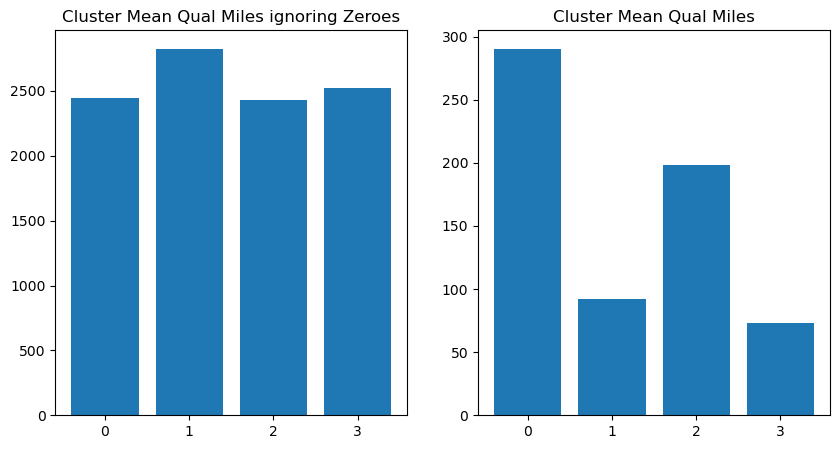

In [40]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.bar(height = means_wo_0['Qual_miles'], x=cluster_medians.index)
ax.set_title('Cluster Mean Qual Miles ignoring Zeroes');


ax = fig.add_subplot(122)
ax.bar(height = cluster_means['Qual_miles'], x=cluster_medians.index)
ax.set_title('Cluster Mean Qual Miles');

## The above bar graph hints that there are a lot of customers in clusters 1,2,3 who have 0 qual miles 

In [41]:
zero_qual_miles_rows = frefly.groupby('k_clusters_4')['Qual_miles'].apply(lambda x: x)==0
zero_qual_miles_rows.sum()

3773

# We can see that out of 3999 customers, 3773 have zero qual miles
# This suggests that the average qual miles do not give the real understanding about the customers